In [117]:
import pandas as pd
import re
import ast
from nltk import bigrams, trigrams
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [118]:
df = pd.read_csv("data_komen_youtube.csv")
print("Jumlah data awal:", len(df))

Jumlah data awal: 2152


In [119]:
# Hapus huruf berulang
df.loc[:, "no_repeated"] = df["stemming"].apply(
    lambda x: re.sub(r'(.)\1+', r'\1', x) if isinstance(x, str) else x)

In [120]:
# Ubah string mjd list
def convert_to_list(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x.split()
    except:
        return []

df['token_list'] = df['no_repeated'].apply(convert_to_list)

In [121]:
# Menghapus Kata Pendek (<= 3 huruf)
df['final_tokens'] = df['token_list'].apply(lambda x: [word for word in x if len(word) > 3])

In [122]:
# Hapus duplikat komentar dari 1 akun

df = df.drop_duplicates(subset=["author", "no_repeated"], keep="first").reset_index(drop=True)
print(f"Jumlah data setelah remove duplikat: {len(df)}")

Jumlah data setelah remove duplikat: 2129


In [123]:
df.head(10)

,nama_channel,judul_video,author,komentar,casefolding,stripping,normalisasi,tokenizing,stopword_removal,stemming,no_repeated,token_list,final_tokens
0,Pebbi Lieyanti,"BELI SEMUA MAKANAN VIRAL TIKTOK, PART 31!",@sugiartisunoto,akuu baru tauu kaka uda nikahh,akuu baru tauu kaka uda nikahh,akuu baru tauu kaka uda nikahh,akuu baru tauu kaka sudah nikahh,"['akuu', 'baru', 'tauu', 'kaka', 'sudah', 'nik...","['akuu', 'tauu', 'kaka', 'nikahh']","['akuu', 'tauu', 'kaka', 'nikahh']","['aku', 'tau', 'kaka', 'nikah']","[aku, tau, kaka, nikah]","[kaka, nikah]"
1,Pebbi Lieyanti,"BELI SEMUA MAKANAN VIRAL TIKTOK, PART 31!",@Ayaww-channel,knp aga gelap ka,knp aga gelap ka,knp aga gelap ka,kenapa aga gelap ka,"['kenapa', 'aga', 'gelap', 'ka']","['aga', 'gelap', 'ka']","['aga', 'gelap', 'ka']","['aga', 'gelap', 'ka']","[aga, gelap, ka]",[gelap]
2,Pebbi Lieyanti,"BELI SEMUA MAKANAN VIRAL TIKTOK, PART 31!",@Firasafira-o7p,"kaa masukan nih yaa\naudionya benahin ka, enta...","kaa masukan nih yaa\naudionya benahin ka, enta...","kaa masukan nih yaa\naudionya benahin ka, enta...","kaa masukan nan yaa audionya benahin ka, entah...","['kaa', 'masukan', 'nan', 'yaa', 'audionya', '...","['kaa', 'masukan', 'nan', 'yaa', 'audionya', '...","['kaa', 'masuk', 'nan', 'yaa', 'audio', 'benah...","['ka', 'masuk', 'nan', 'ya', 'audio', 'benahin...","[ka, masuk, nan, ya, audio, benahin, ka, mick,...","[masuk, audio, benahin, mick, suara, kakanya, ..."
3,Pebbi Lieyanti,"BELI SEMUA MAKANAN VIRAL TIKTOK, PART 31!",@Flowerblue-h5e,Kak plis membeli mainan ❤🎉,kak plis membeli mainan ❤🎉,kak plis membeli mainan ❤🎉,kak tolong membeli mainan ❤🎉,"['kak', 'tolong', 'membeli', 'mainan']","['kak', 'tolong', 'membeli', 'mainan']","['kak', 'tolong', 'beli', 'main']","['kak', 'tolong', 'beli', 'main']","[kak, tolong, beli, main]","[tolong, beli, main]"
4,Pebbi Lieyanti,"BELI SEMUA MAKANAN VIRAL TIKTOK, PART 31!",@TEGARGanteng-j7s,Kak pebbi makan makanan berhadiah dong 😅😅😅,kak pebbi makan makanan berhadiah dong 😅😅😅,kak pebbi makan makanan berhadiah dong 😅😅😅,kak pebbi makan makanan berhadiah nan 😅😅😅,"['kak', 'pebbi', 'makan', 'makanan', 'berhadia...","['kak', 'pebbi', 'makan', 'makanan', 'berhadia...","['kak', 'pebbi', 'makan', 'makan', 'hadiah', '...","['kak', 'pebi', 'makan', 'makan', 'hadiah', 'n...","[kak, pebi, makan, makan, hadiah, nan]","[pebi, makan, makan, hadiah]"
5,Pebbi Lieyanti,"BELI SEMUA MAKANAN VIRAL TIKTOK, PART 31!",@britneydexfine4853,gacorr,gacorr,gacorr,gacorr,['gacorr'],['gacorr'],['gacorr'],['gacor'],[gacor],[gacor]
6,Pebbi Lieyanti,"BELI SEMUA MAKANAN VIRAL TIKTOK, PART 31!",@AlzeynAbhiChandra,Ci bikin konten make up lagi ci,ci bikin konten make up lagi ci,ci bikin konten make up lagi ci,ci bikin konten make up lagi ci,"['ci', 'bikin', 'konten', 'make', 'up', 'lagi'...","['ci', 'bikin', 'konten', 'make', 'up', 'ci']","['ci', 'bikin', 'konten', 'make', 'up', 'ci']","['ci', 'bikin', 'konten', 'make', 'up', 'ci']","[ci, bikin, konten, make, up, ci]","[bikin, konten, make]"
7,Pebbi Lieyanti,"BELI SEMUA MAKANAN VIRAL TIKTOK, PART 31!",@24_AmeliaSusanti,Kakkkk coba semua makanan khas balii gasiii ru...,kakkkk coba semua makanan khas balii gasiii ru...,kakkkk coba semua makanan khas balii gasiii ru...,kakkkk coba semua makanan khas balii gasiii ru...,"['kakkkk', 'coba', 'semua', 'makanan', 'khas',...","['kakkkk', 'coba', 'makanan', 'khas', 'balii',...","['kakkkk', 'coba', 'makan', 'khas', 'balii', '...","['kak', 'coba', 'makan', 'khas', 'bali', 'gasi...","[kak, coba, makan, khas, bali, gasi, rujak, ku...","[coba, makan, khas, bali, gasi, rujak, kuah, p..."
8,Pebbi Lieyanti,"BELI SEMUA MAKANAN VIRAL TIKTOK, PART 31!",@matchaa432,3:41 aku udah pernah coba enak banget 🎉,3:41 aku udah pernah coba enak banget 🎉,3:41 aku udah pernah coba enak banget 🎉,3:41 aku sudah pernah coba enak banget 🎉,"['3', '41', 'aku', 'sudah', 'pernah', 'coba', ...","['3', '41', 'coba', 'enak', 'banget']","['3', '41', 'coba', 'enak', 'banget']","['3', '41', 'coba', 'enak', 'banget']","[3, 41, coba,

In [124]:
df.to_csv("data_komen_preprocessing.csv", index=False, encoding="utf-8-sig")

print("File tersimpan sebagai 'data_komen_preprocessing.csv'")

File tersimpan sebagai 'data_komen_preprocessing.csv'


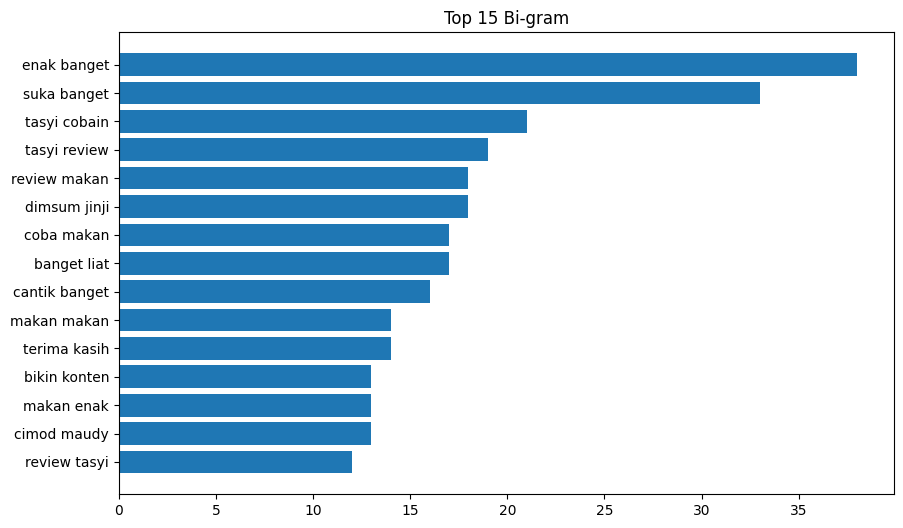

In [125]:
# Bi-gram
tokens_all = [word for tokens in df['final_tokens'] for word in tokens]
bi_grams = list(bigrams(tokens_all))
bi_count = Counter(bi_grams).most_common(15)

# Tampilkan bar chart bigram
plt.figure(figsize=(10,6))
plt.barh([f"{w1} {w2}" for (w1,w2),_ in bi_count], [c for _,c in bi_count])
plt.gca().invert_yaxis()
plt.title("Top 15 Bi-gram")
plt.show()

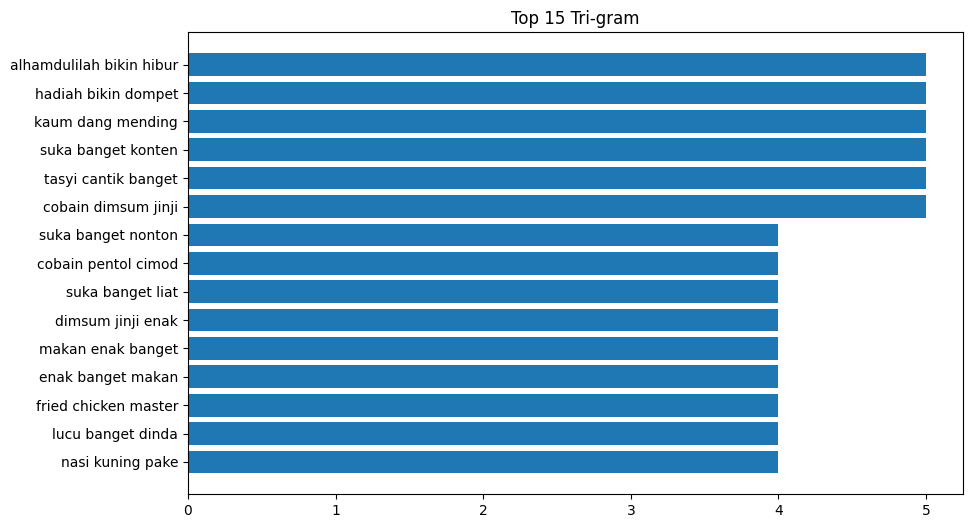

In [126]:
# Tri-gram
tri_grams = list(trigrams(tokens_all))
tri_count = Counter(tri_grams).most_common(15)

plt.figure(figsize=(10,6))
plt.barh([f"{w1} {w2} {w3}" for (w1,w2,w3),_ in tri_count], [c for _,c in tri_count])
plt.gca().invert_yaxis()
plt.title("Top 15 Tri-gram")
plt.show()

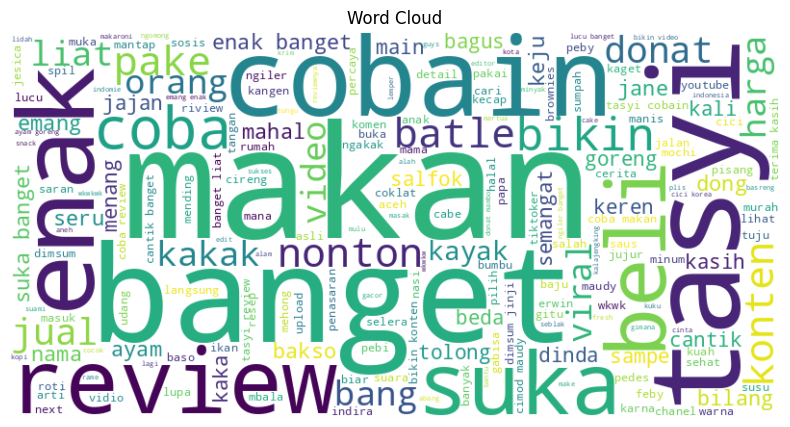

In [127]:
# WordCloud
all_content = ' '.join([' '.join(token) for token in df['final_tokens']])
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(all_content)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud")
plt.show()

wordcloud.to_file("wordcloud.png")